In [1]:
import numpy as np
import pandas as pd
from os.path import join as pjoin
from scipy.stats.stats import sem
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.ColeNet import get_parcel2label_by_ColeName

anal_dir = '/nfs/s2/userhome/chenxiayu/workingdir/study/visual_dev/analysis'
work_dir = pjoin(anal_dir, 'plot/plot_dev_line')
info_file = '/nfs/e1/HCPD/HCPD_SubjInfo.csv'

In [2]:
def plot_dev_line(data_file, info_file, rois, ylabel, n_row, n_col,
                  figsize=None, out_file=None):

    # inputs
    Hemis = ('L', 'R')

    # load
    df = pd.read_csv(data_file)
    info_df = pd.read_csv(info_file)
    age_name = 'age in years'
    ages = np.array(info_df[age_name])
    age_uniq = np.unique(ages)

    rois_without_hemi = ['_'.join(i.split('_')[1:]) for i in rois]
    rois_uniq = np.unique(rois_without_hemi)
    max_row_idx = int((len(rois_uniq)-1) / n_col)
    _, axes = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row == 1 and n_col == 1:
        axes = np.array([[axes]])
    elif axes.shape != (n_row, n_col):
        axes = axes.reshape((n_row, n_col))
    for i, roi_without_hemi in enumerate(rois_uniq):
        row_idx = int(i / n_col)
        col_idx = i % n_col
        ax = axes[row_idx, col_idx]
        for Hemi in Hemis:
            roi = f'{Hemi}_{roi_without_hemi}'
            if roi not in rois:
                continue
            meas_vec = np.array(df[roi])
            ys = []
            yerrs = []
            for age in age_uniq:
                meas_tmp = meas_vec[ages == age]
                ys.append(np.mean(meas_tmp))
                yerrs.append(sem(meas_tmp))
            ax.errorbar(age_uniq, ys, yerrs, label=roi)
        if col_idx == 0:
            ax.set_ylabel(ylabel)
        if row_idx == max_row_idx:
            ax.set_xlabel(age_name)
        ax.legend()
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

# plot line for Cole_visual_ROI

In [3]:
net_names = ['Primary Visual', 'Secondary Visual',
             'Posterior Multimodal', 'Ventral Multimodal']
rois = list(get_parcel2label_by_ColeName(net_names).keys())

Find all ColeNames!


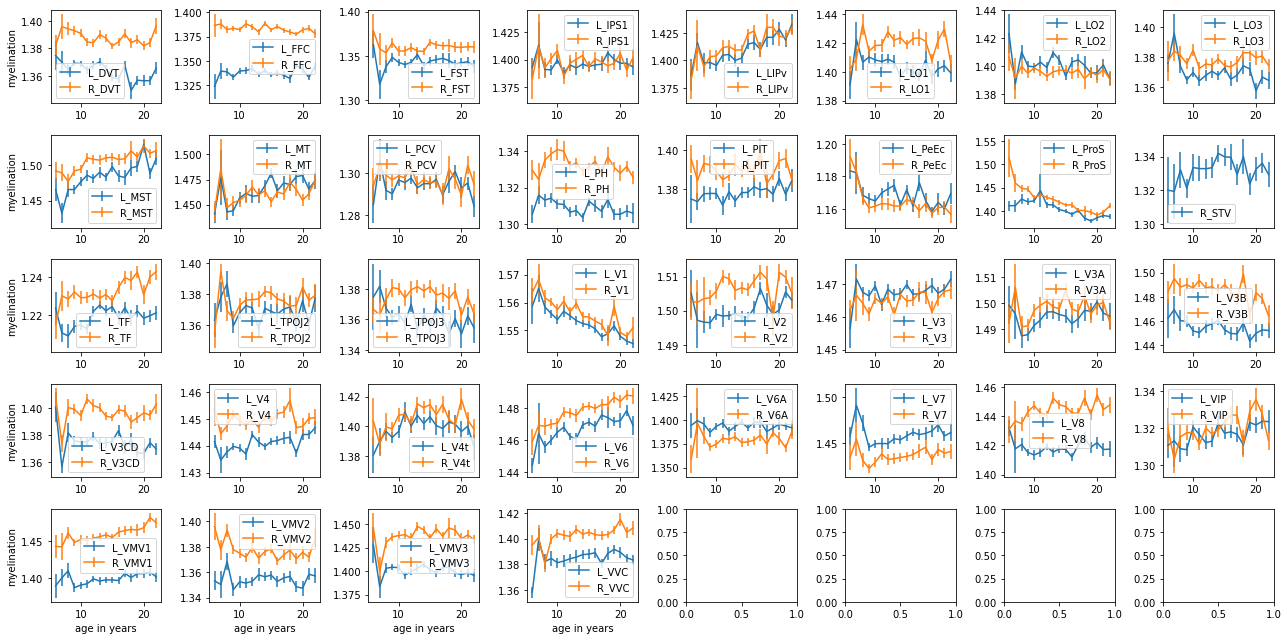

In [5]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_HCP_MMP1.csv'),
    info_file=info_file, rois=rois,
    ylabel='myelination', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_myelin_Cole_visual_ROI.jpg')
)

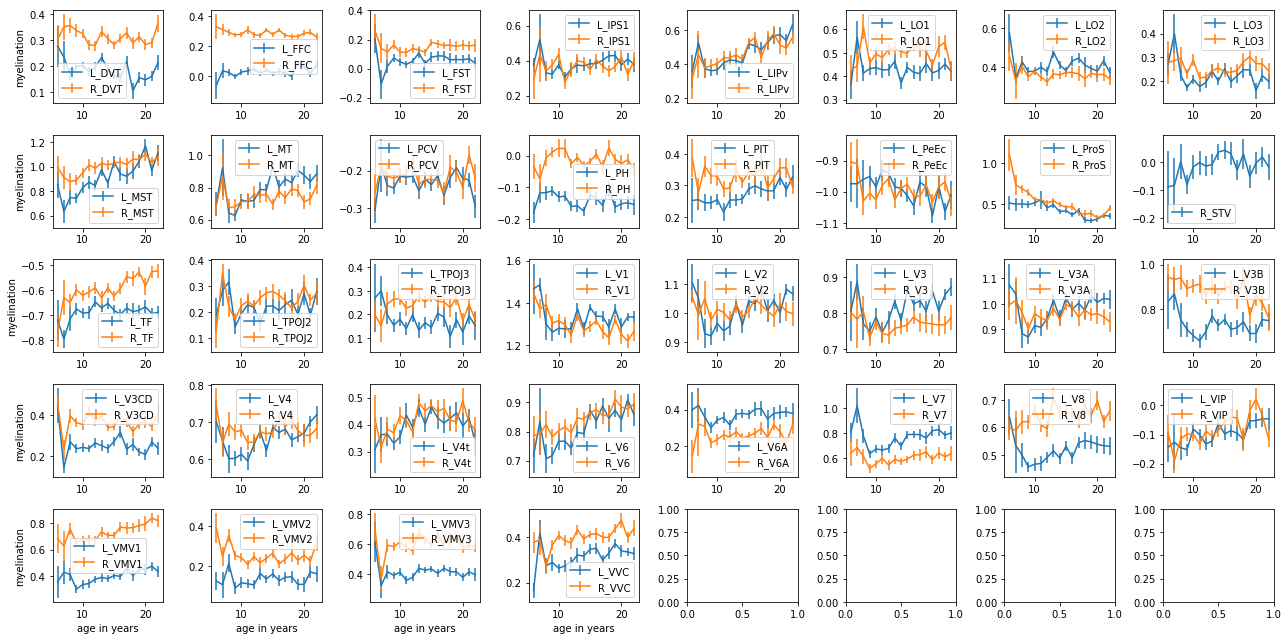

In [8]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_HCP_MMP1_zscore.csv'),
    info_file=info_file, rois=rois,
    ylabel='myelination', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_myelin_Cole_visual_ROI_zscore.jpg')
)

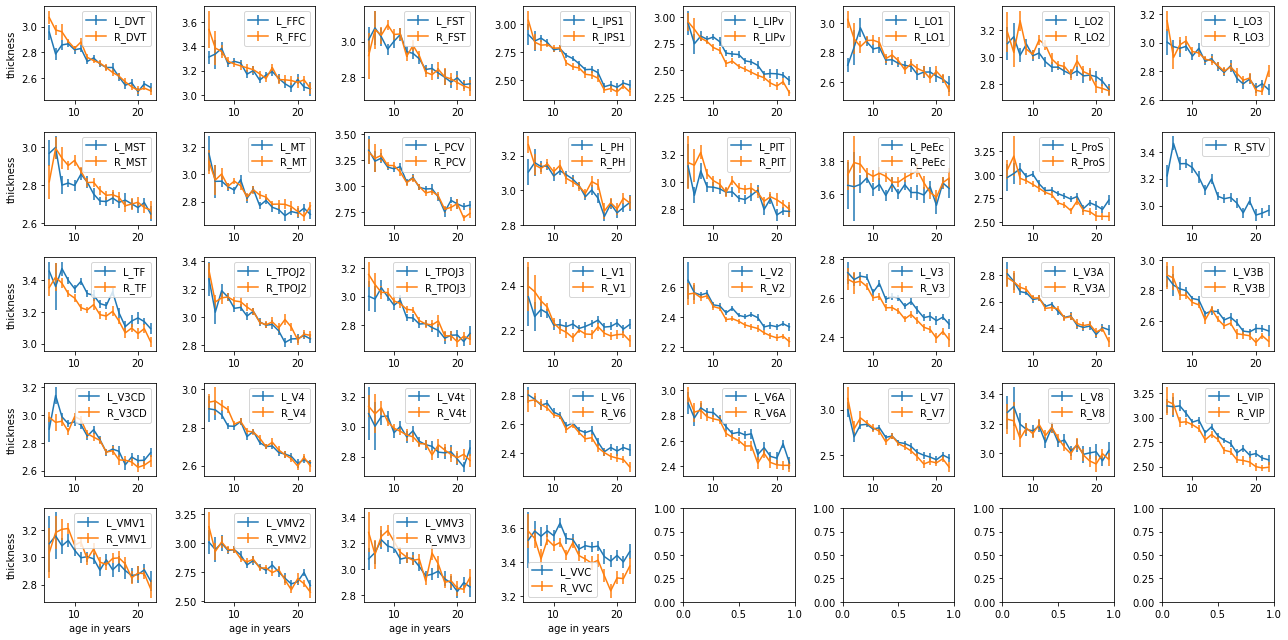

In [10]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_HCP_MMP1.csv'),
    info_file=info_file, rois=rois,
    ylabel='thickness', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_thickness_Cole_visual_ROI.jpg')
)

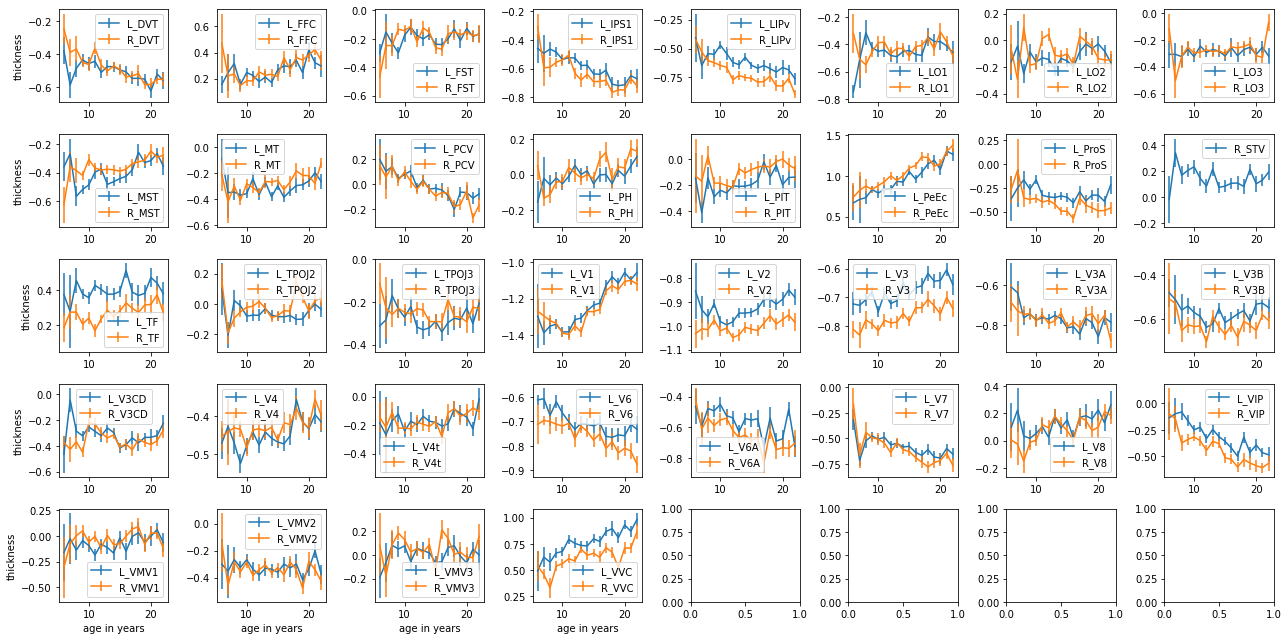

In [11]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_HCP_MMP1_zscore.csv'),
    info_file=info_file, rois=rois,
    ylabel='thickness', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_thickness_Cole_visual_ROI_zscore.jpg')
)

# plot line for LR

In [12]:
rois = ('L_cortex', 'R_cortex')

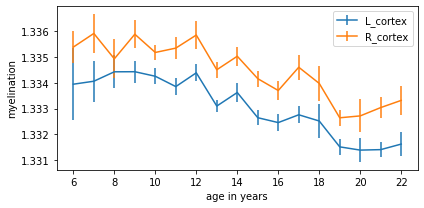

In [14]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_LR.csv'),
    info_file=info_file, rois=rois,
    ylabel='myelination', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_myelin_LR.jpg')
)

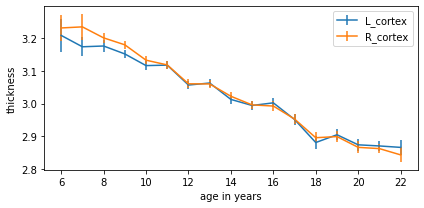

In [15]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_LR.csv'),
    info_file=info_file, rois=rois,
    ylabel='thickness', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_thickness_LR.jpg')
)

# plot line for Cole_visual_LR

In [16]:
rois = ('L_cole_visual', 'R_cole_visual')

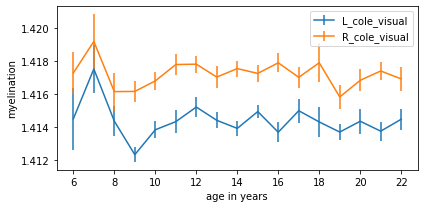

In [18]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_Cole_visual_LR.csv'),
    info_file=info_file, rois=rois,
    ylabel='myelination', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_myelin_Cole_visual_LR.jpg')
)

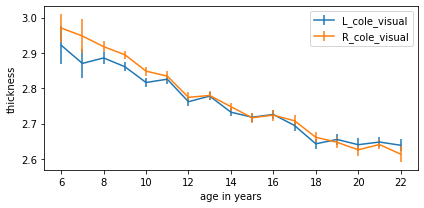

In [19]:
plot_dev_line(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_Cole_visual_LR.csv'),
    info_file=info_file, rois=rois,
    ylabel='thickness', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_thickness_Cole_visual_LR.jpg')
)